In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Завантаження датасету
train_df = pd.read_parquet("/kaggle/input/unlp-2025-shared-task-classification-techniques/train.parquet")

# Огляд загальної інформації
print(train_df.info())

# Виведення перших 5 рядків
print(train_df.head())

# Перевірка на пропущені значення
print(train_df.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3822 entries, 0 to 3821
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             3822 non-null   object
 1   content        3822 non-null   object
 2   lang           3822 non-null   object
 3   manipulative   3822 non-null   bool  
 4   techniques     2589 non-null   object
 5   trigger_words  2589 non-null   object
dtypes: bool(1), object(5)
memory usage: 153.2+ KB
None
                                     id  \
0  0bb0c7fa-101b-4583-a5f9-9d503339141c   
1  7159f802-6f99-4e9d-97bd-6f565a4a0fae   
2  e6a427f1-211f-405f-bd8b-70798458d656   
3  1647a352-4cd3-40f6-bfa1-d87d42e34eea   
4  9c01de00-841f-4b50-9407-104e9ffb03bf   

                                             content lang  manipulative  \
0  Новий огляд мапи DeepState від російського вій...   uk          True   
1  Недавно 95 квартал жёстко поглумился над русск...   ru          True   
2  🤩\nТим 

In [59]:
train_df

,id,content,lang,manipulative,techniques,trigger_words
0,0bb0c7fa-101b-4583-a5f9-9d503339141c,Новий огляд мапи DeepState від російського вій...,uk,True,"[euphoria, loaded_language]","[[27, 63], [65, 88], [90, 183], [186, 308]]"
1,7159f802-6f99-4e9d-97bd-6f565a4a0fae,Недавно 95 квартал жёстко поглумился над русск...,ru,True,"[loaded_language, cherry_picking]","[[0, 40], [123, 137], [180, 251], [253, 274]]"
2,e6a427f1-211f-405f-bd8b-70798458d656,🤩\nТим часом йде евакуація Бєлгородського авто...,uk,True,"[loaded_language, euphoria]","[[55, 100]]"
3,1647a352-4cd3-40f6-bfa1-d87d42e34eea,В Україні найближчим часом мають намір посилит...,uk,False,None,None
4,9c01de00-841f-4b50-9407-104e9ffb03bf,"Расчёты 122-мм САУ 2С1 ""Гвоздика"" 132-й бригад...",ru,True,[loaded_language],"[[114, 144]]"
...,...,...,...,...,...,...
3817,0e5dd135-ef41-48d3-b274-faedf3a2126c,🤭\nросія ставить ППО на дахах адмінбудівель\nр...,uk,True,"[loaded_language, euphoria]","[[2, 7], [43, 75], [77, 143], [145, 178], [340..."
3818,08e6772a-9793-4ec9-babd-2a9e0e8b31f9,"К слову, Бабий не просто «ларечник», а и челов...",ru,True,[loaded_language],"[[25, 35], [103, 128], [149, 166]]"
3819,d7cfa984-46f2-450d-b4ec-28a0b5d93756,"Глава ФСБ Бортников ответил журналистам, почем...",ru,False,None,None
3820,4256b2b8-43bc-4d90-95c4-5fb25f1ab0e3,В ДНР завозили наркотики в бытовой технике\nОб...,ru,False,None,None


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


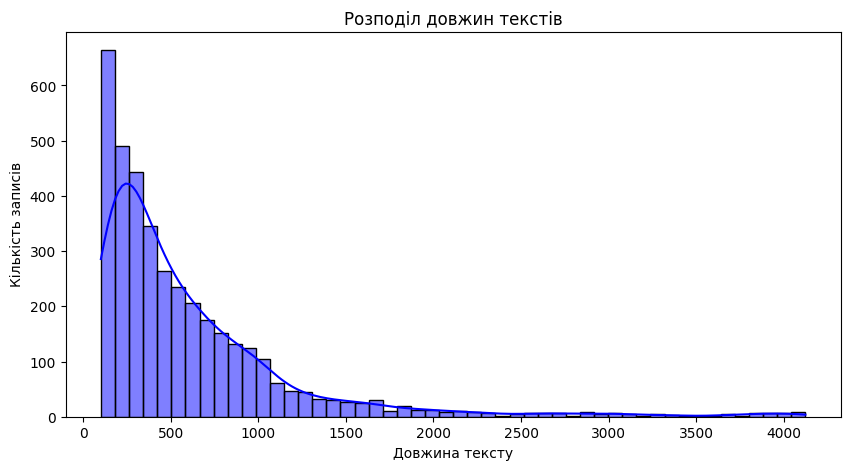

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


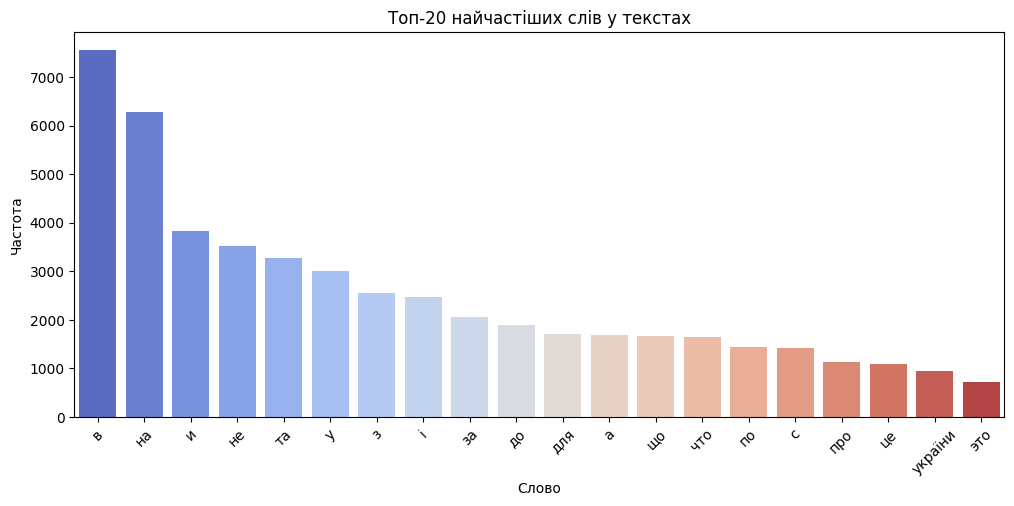

In [60]:
# Довжина текстів
train_df["text_length"] = train_df["content"].apply(len)

# Візуалізація розподілу довжин текстів
plt.figure(figsize=(10, 5))
sns.histplot(train_df["text_length"], bins=50, kde=True, color="blue")
plt.xlabel("Довжина тексту")
plt.ylabel("Кількість записів")
plt.title("Розподіл довжин текстів")
plt.show()

# Топ-10 найпоширеніших слів (без стоп-слів)
from collections import Counter
import re

# Функція для обробки тексту (видалення пунктуації, приведення до нижнього регістру)
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text.lower())  # Видалення пунктуації
    return text.split()

# Створення списку всіх слів
all_words = [word for text in train_df["content"].dropna() for word in preprocess_text(text)]
word_counts = Counter(all_words)

# Топ-20 найпоширеніших слів
top_words = word_counts.most_common(20)

# Візуалізація
plt.figure(figsize=(12, 5))
sns.barplot(x=[word[0] for word in top_words], y=[word[1] for word in top_words], palette="coolwarm")
plt.xlabel("Слово")
plt.ylabel("Частота")
plt.title("Топ-20 найчастіших слів у текстах")
plt.xticks(rotation=45)
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


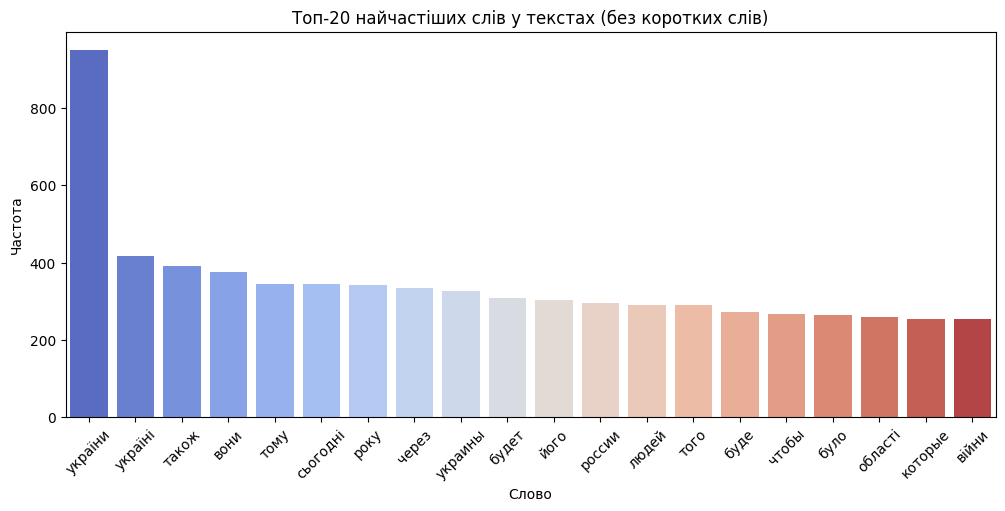

In [82]:
# Функція для обробки тексту (видалення пунктуації, приведення до нижнього регістру)
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text.lower())  # Видалення пунктуації
    return [word for word in text.split() if len(word) > 3]  # Виключаємо слова довжиною 1-2 символи

# Створення списку всіх слів
all_words = [word for text in train_df["content"].dropna() for word in preprocess_text(text)]
word_counts = Counter(all_words)

# Топ-20 найпоширеніших слів
top_words = word_counts.most_common(20)

# Візуалізація
plt.figure(figsize=(12, 5))
sns.barplot(x=[word[0] for word in top_words], y=[word[1] for word in top_words], palette="coolwarm")
plt.xlabel("Слово")
plt.ylabel("Частота")
plt.title("Топ-20 найчастіших слів у текстах (без коротких слів)")
plt.xticks(rotation=45)
plt.show()


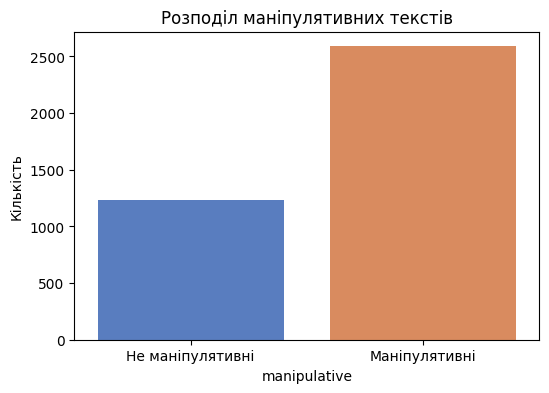

In [61]:
# Частка маніпулятивних та неманіпулятивних текстів
manipulative_counts = train_df["manipulative"].value_counts()

# Візуалізація
plt.figure(figsize=(6, 4))
sns.barplot(x=manipulative_counts.index, y=manipulative_counts.values, palette="muted")
plt.xticks([0, 1], ["Не маніпулятивні", "Маніпулятивні"])
plt.ylabel("Кількість")
plt.title("Розподіл маніпулятивних текстів")
plt.show()


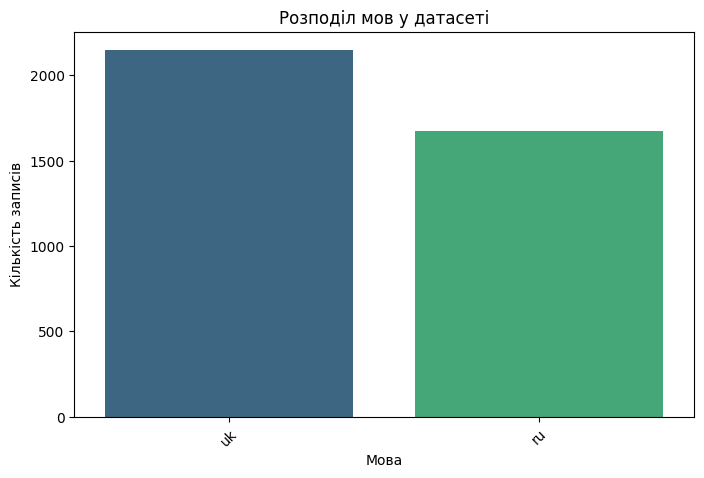

In [62]:
# Аналіз унікальних мов
lang_counts = train_df["lang"].value_counts()

# Візуалізація розподілу мов
plt.figure(figsize=(8, 5))
sns.barplot(x=lang_counts.index, y=lang_counts.values, palette="viridis")
plt.xlabel("Мова")
plt.ylabel("Кількість записів")
plt.title("Розподіл мов у датасеті")
plt.xticks(rotation=45)
plt.show()


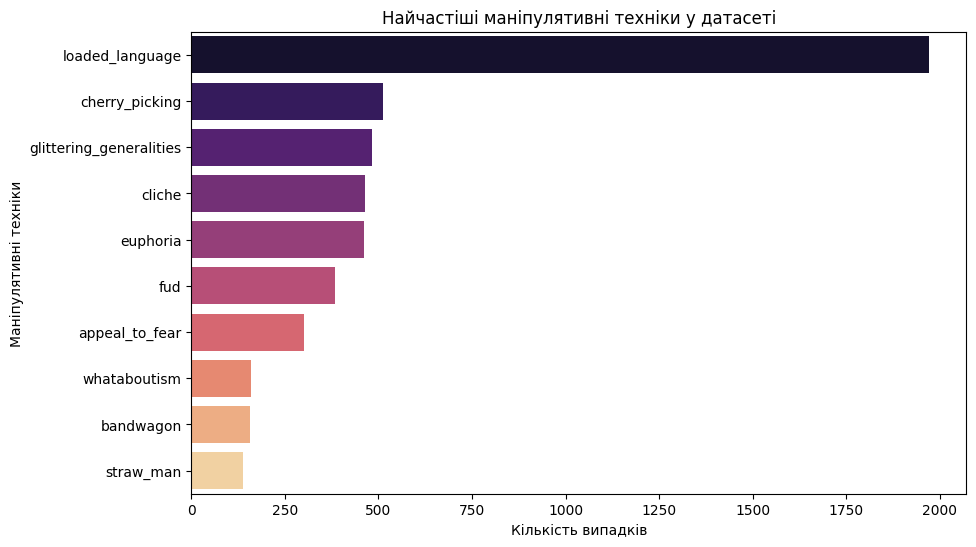

In [63]:
# Перетворення рядків списків у Python-списки
train_df["techniques"] = train_df["techniques"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Розгортання списку маніпулятивних технік
all_techniques = [technique for techniques in train_df["techniques"].dropna() for technique in techniques]

# Підрахунок частоти кожної техніки
technique_counts = pd.Series(all_techniques).value_counts()

# Візуалізація
plt.figure(figsize=(10, 6))
sns.barplot(x=technique_counts.values, y=technique_counts.index, palette="magma")
plt.xlabel("Кількість випадків")
plt.ylabel("Маніпулятивні техніки")
plt.title("Найчастіші маніпулятивні техніки у датасеті")
plt.show()



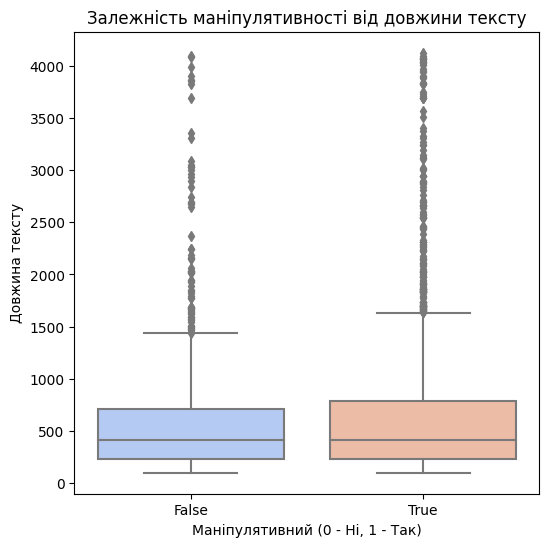

In [65]:
plt.figure(figsize=(6, 6))
sns.boxplot(x=train_df["manipulative"], y=train_df["text_length"], palette="coolwarm")
plt.xlabel("Маніпулятивний (0 - Ні, 1 - Так)")
plt.ylabel("Довжина тексту")
plt.title("Залежність маніпулятивності від довжини тексту")
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


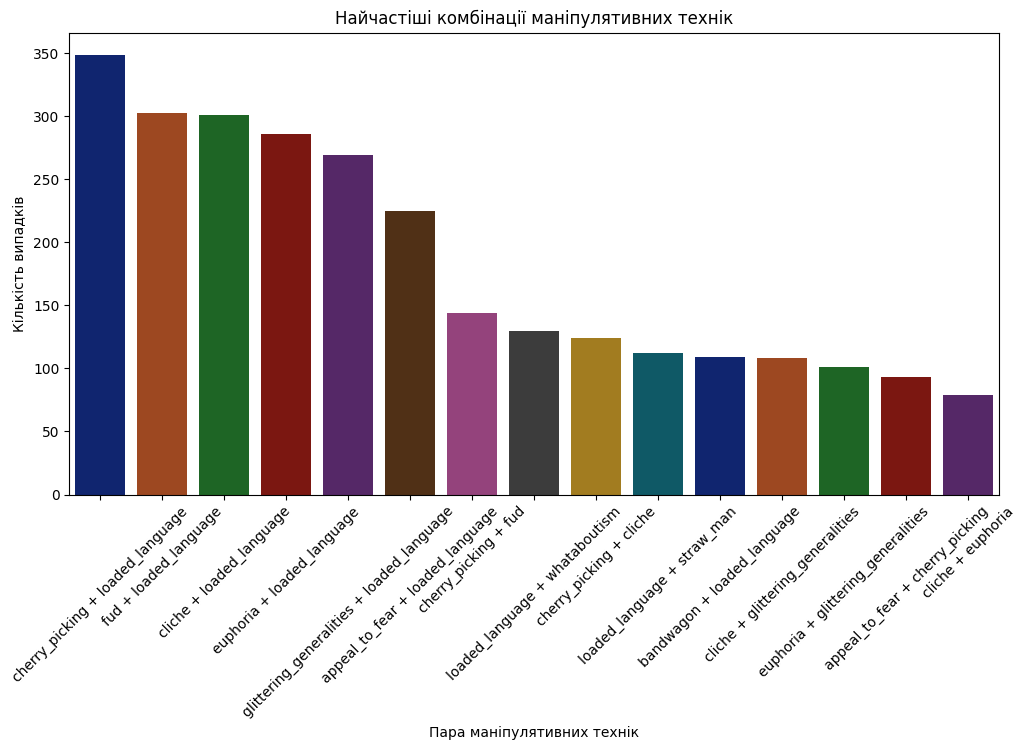

In [66]:
# Побудова матриці спільного використання маніпуляцій
from itertools import combinations
import numpy as np

# Формування пар технік
technique_pairs = [tuple(sorted(comb)) for techniques in train_df["techniques"].dropna() for comb in combinations(techniques, 2)]

# Підрахунок співзустрічання технік
pair_counts = pd.Series(technique_pairs).value_counts().head(15)

# Візуалізація
plt.figure(figsize=(12, 6))
sns.barplot(x=[f"{pair[0]} + {pair[1]}" for pair in pair_counts.index], y=pair_counts.values, palette="dark")
plt.xlabel("Пара маніпулятивних технік")
plt.ylabel("Кількість випадків")
plt.title("Найчастіші комбінації маніпулятивних технік")
plt.xticks(rotation=45)
plt.show()


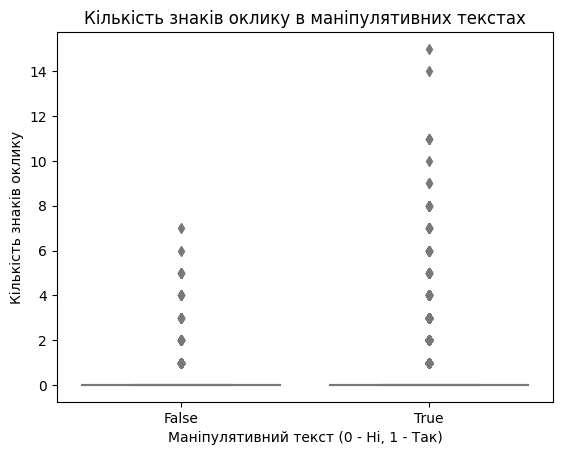

In [67]:
# Функції для аналізу текстових характеристик
train_df["num_sentences"] = train_df["content"].apply(lambda x: len(x.split(".")))  # Кількість речень
train_df["num_exclamations"] = train_df["content"].apply(lambda x: x.count("!"))  # Кількість "!"
train_df["num_questions"] = train_df["content"].apply(lambda x: x.count("?"))  # Кількість "?"

# Візуалізація різниці між маніпулятивними та неманіпулятивними текстами
sns.boxplot(x=train_df["manipulative"], y=train_df["num_exclamations"], palette="coolwarm")
plt.xlabel("Маніпулятивний текст (0 - Ні, 1 - Так)")
plt.ylabel("Кількість знаків оклику")
plt.title("Кількість знаків оклику в маніпулятивних текстах")
plt.show()


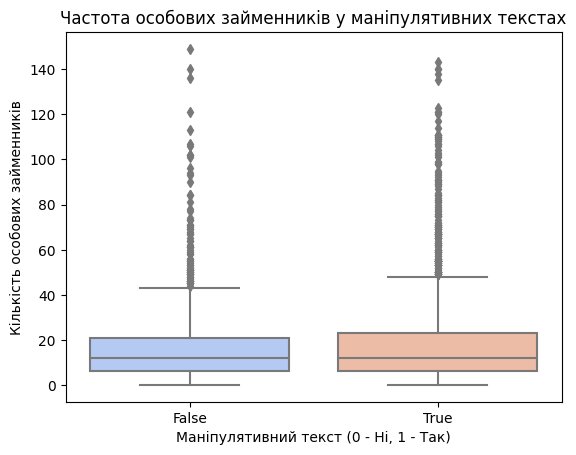

In [68]:
# Використання займенників
personal_pronouns = ["я", "ми", "ти", "ви", "він", "вона", "вони"]
train_df["num_pronouns"] = train_df["content"].apply(lambda x: sum(x.lower().count(word) for word in personal_pronouns))

sns.boxplot(x=train_df["manipulative"], y=train_df["num_pronouns"], palette="coolwarm")
plt.xlabel("Маніпулятивний текст (0 - Ні, 1 - Так)")
plt.ylabel("Кількість особових займенників")
plt.title("Частота особових займенників у маніпулятивних текстах")
plt.show()


In [69]:
from collections import defaultdict

# Групування текстів за техніками
technique_word_counts = defaultdict(Counter)
for _, row in train_df.iterrows():
    if isinstance(row["techniques"], list):
        words = preprocess_text(row["content"])
        for tech in row["techniques"]:
            technique_word_counts[tech].update(words)

# Топ-10 слів для кожної техніки
for tech, counter in technique_word_counts.items():
    print(f"Техніка: {tech}")
    print(counter.most_common(10))
    print("-" * 50)


<Figure size 1000x600 with 0 Axes>

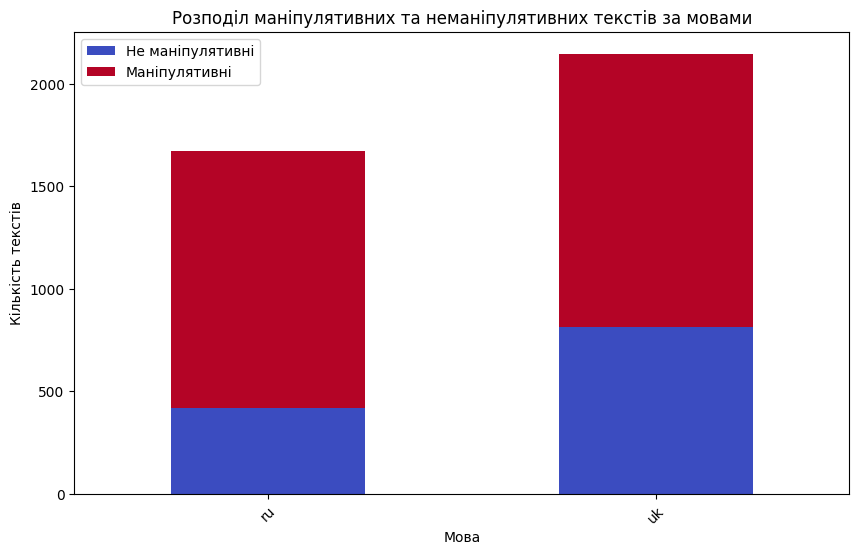

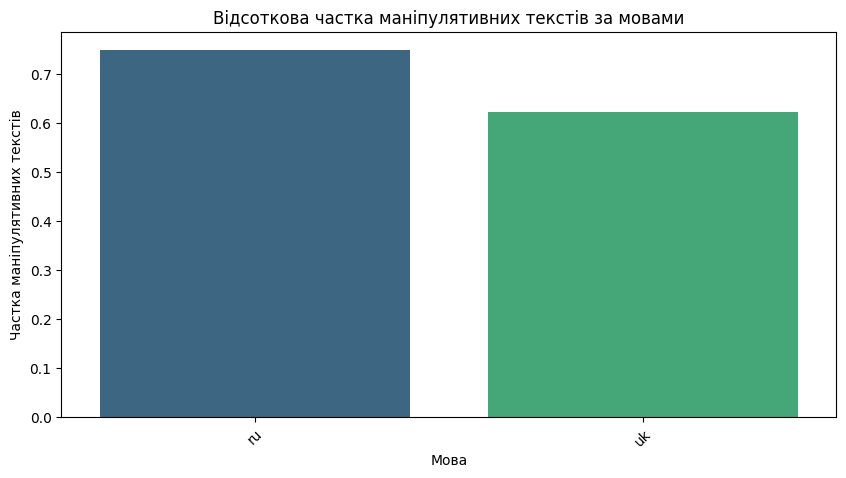

In [70]:
# Перетворимо 'manipulative' в числовий формат для коректного групування
train_df["manipulative"] = train_df["manipulative"].astype(int)

# Аналіз розподілу маніпулятивних текстів за мовами
lang_manipulative_counts = train_df.groupby("lang")["manipulative"].value_counts().unstack().fillna(0)

# Візуалізація розподілу
plt.figure(figsize=(10, 6))
lang_manipulative_counts.plot(kind="bar", stacked=True, colormap="coolwarm", figsize=(10, 6))
plt.xlabel("Мова")
plt.ylabel("Кількість текстів")
plt.title("Розподіл маніпулятивних та неманіпулятивних текстів за мовами")
plt.legend(["Не маніпулятивні", "Маніпулятивні"])
plt.xticks(rotation=45)
plt.show()

# Аналіз відсоткового співвідношення маніпулятивних текстів у кожній мові
lang_manipulative_ratio = (lang_manipulative_counts[1.0] / lang_manipulative_counts.sum(axis=1)).fillna(0)

# Візуалізація відсотків маніпулятивності
plt.figure(figsize=(10, 5))
sns.barplot(x=lang_manipulative_ratio.index, y=lang_manipulative_ratio.values, palette="viridis")
plt.xlabel("Мова")
plt.ylabel("Частка маніпулятивних текстів")
plt.title("Відсоткова частка маніпулятивних текстів за мовами")
plt.xticks(rotation=45)
plt.show()


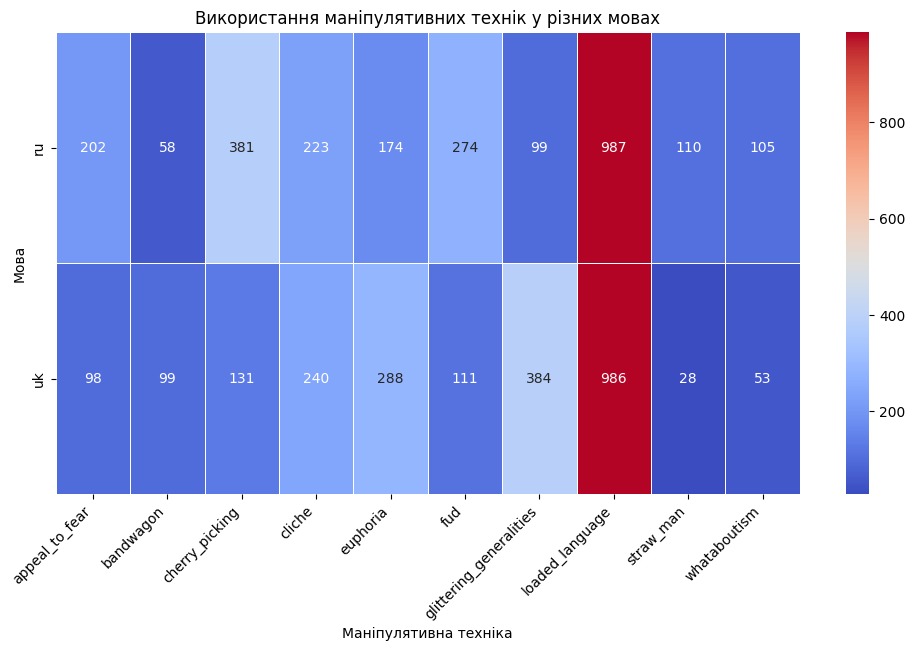

In [71]:
# Перетворимо techniques у списки (якщо вони у форматі рядків)
train_df["techniques"] = train_df["techniques"].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Розгортання технік по мовах
lang_techniques = train_df.explode("techniques").groupby("lang")["techniques"].value_counts().unstack().fillna(0)

# Візуалізація heatmap технік маніпуляції за мовами
plt.figure(figsize=(12, 6))
sns.heatmap(lang_techniques, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)
plt.xlabel("Маніпулятивна техніка")
plt.ylabel("Мова")
plt.title("Використання маніпулятивних технік у різних мовах")
plt.xticks(rotation=45, ha="right")
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128170 (\N{FLEXED BICEPS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128165 (\N{COLLISION SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python

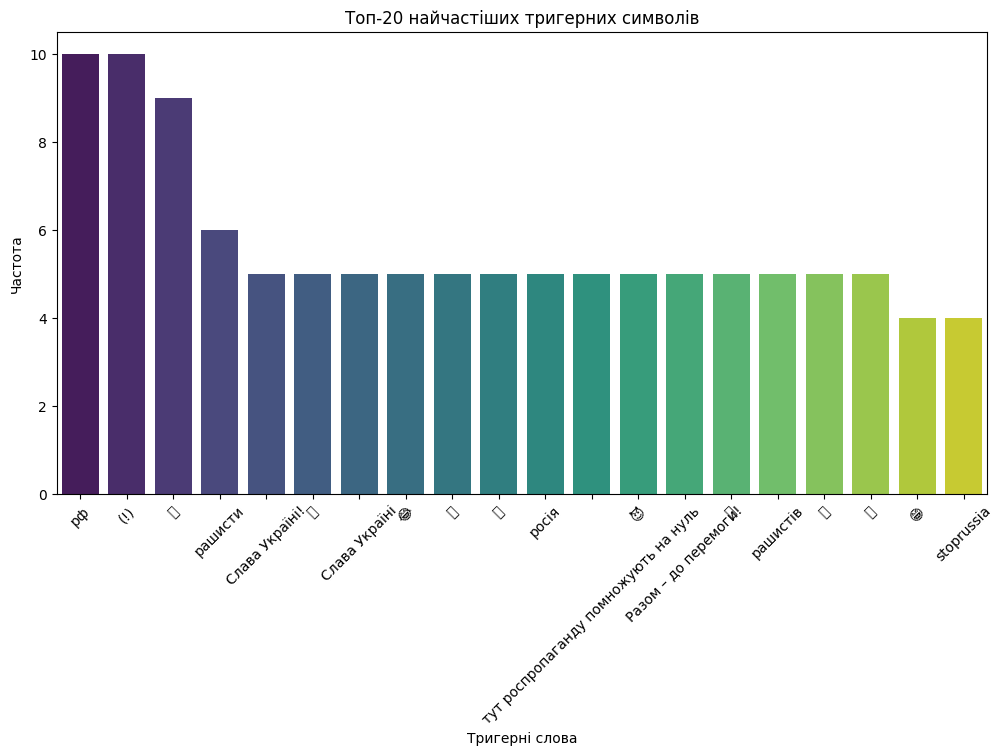

In [77]:
# Об'єднання усіх тригерних слів у датасеті
all_trigger_words = train_df["trigger_words_extracted"].explode().dropna()

# Перевіряємо, чи є дані
if not all_trigger_words.empty:
    # Підрахунок частоти тригерних слів
    trigger_word_counts = Counter(all_trigger_words)

    # Топ-20 тригерних слів
    top_trigger_words = trigger_word_counts.most_common(20)

    if top_trigger_words:
        words, counts = zip(*top_trigger_words)

        # Візуалізація топ-20 тригерних слів
        plt.figure(figsize=(12, 6))
        sns.barplot(x=list(words), y=list(counts), palette="viridis")
        plt.title("Топ-20 найчастіших тригерних символів")
        plt.xlabel("Тригерні слова")
        plt.ylabel("Частота")
        plt.xticks(rotation=45)
        plt.show()


    
else:
    print("Колонка trigger_words_extracted порожня або не містить даних.")


In [72]:
# Витягування перших 5 текстів зі стовпця content
first_5_texts = train_df["content"].head(6)

# Виведення результату
print(first_5_texts)

0    Новий огляд мапи DeepState від російського вій...
1    Недавно 95 квартал жёстко поглумился над русск...
2    🤩\nТим часом йде евакуація Бєлгородського авто...
3    В Україні найближчим часом мають намір посилит...
4    Расчёты 122-мм САУ 2С1 "Гвоздика" 132-й бригад...
5    Апартаменти\n триповерхова келія Паші Лєбєдя, ...
Name: content, dtype: object


In [73]:
import re

def extract_source(text):
    # 1. Шукаємо @username у тексті
    at_match = re.search(r'@(\S+)', text)
    if at_match:
        return f"@{at_match.group(1)}"
    
    # 2. Шукаємо посилання на Telegram-канал
    tg_pattern = r'(https?://t\.me/[^\s]+)'
    tg_links = re.findall(tg_pattern, text)
    if tg_links:
        return tg_links[0]
    
    # 3. Шукаємо текст після останнього \n або перед першим \n
    if "\n" in text:
        parts = text.rsplit("\n", 1)  # Розбиваємо по останньому \n
        if len(parts[1]) < 50:  # Якщо після останнього \n короткий фрагмент, беремо його
            return parts[1].strip()
        
        # Інакше беремо текст перед першим \n
        parts = text.split("\n", 1)
        if len(parts) > 1:
            return parts[0].strip()
    
    # Якщо нічого не знайдено, повертаємо None
    return None

# Застосування до датасету
train_df["source"] = train_df["content"].apply(extract_source)

# Виведення результатів
train_df[["content", "source"]].head()


,content,source
0,Новий огляд мапи DeepState від російського вій...,@informnapalm
1,Недавно 95 квартал жёстко поглумился над русск...,Недавно 95 квартал жёстко поглумился над русск...
2,🤩\nТим часом йде евакуація Бєлгородського авто...,Новини України | Підпишись
3,В Україні найближчим часом мають намір посилит...,підписуйся на Ukraine NOW
4,"Расчёты 122-мм САУ 2С1 ""Гвоздика"" 132-й бригад...",@polk105


In [74]:
# Виведення перших результатів
train_df[["content", "source"]].head(20)

,content,source
0,Новий огляд мапи DeepState від російського вій...,@informnapalm
1,Недавно 95 квартал жёстко поглумился над русск...,Недавно 95 квартал жёстко поглумился над русск...
2,🤩\nТим часом йде евакуація Бєлгородського авто...,Новини України | Підпишись
3,В Україні найближчим часом мають намір посилит...,підписуйся на Ukraine NOW
4,"Расчёты 122-мм САУ 2С1 ""Гвоздика"" 132-й бригад...",@polk105
5,"Апартаменти\n триповерхова келія Паші Лєбєдя, ...","Скромна, богоугодна."
6,"⚡️\nКитай надеется, что пакетное соглашение о ...",⚡️
7,До сьогоднішнього дня Джо Байден був у Києві п...,#StayStrongWithUkraine
8,⚡️\nПосле освобождения Соледара откроются благ...,— Пушилин
9,Российское руководство сделало террор инструме...,Полное видео.


In [75]:
train_df[train_df["source"] == '@informnapalm']

,id,content,lang,manipulative,techniques,trigger_words,text_length,num_triggers,num_sentences,num_exclamations,num_questions,num_pronouns,source
0,0bb0c7fa-101b-4583-a5f9-9d503339141c,Новий огляд мапи DeepState від російського вій...,uk,1,"[euphoria, loaded_language]","[[27, 63], [65, 88], [90, 183], [186, 308]]",353,0,5,0,0,8,@informnapalm
38,09d78962-895d-458e-aa77-2c758a6aece9,Вчора та сьогодні Z-канали активно публікують ...,uk,1,"[loaded_language, euphoria]","[[0, 233], [429, 514], [516, 606]]",658,0,9,0,0,20,@informnapalm
1117,fc1c5462-70fe-4ad1-a7b3-9e451cf943cc,"Агент ""Сіра зона"" зробив цікавий акцент в супр...",uk,1,[loaded_language],"[[351, 355]]",641,0,7,0,0,24,@informnapalm
2443,fd425be2-ffa6-444b-a24d-281ba800fab9,"На думку OSINT-дослідників \nInformNapalm\n, з...",uk,0,None,None,818,0,10,0,0,40,@informnapalm
2450,329e7c10-4670-48d5-8338-5cc4a36c22f3,Увага! \nОстаннє відео містить жорстокі кадри ...,uk,1,"[loaded_language, cherry_picking]","[[30, 114], [138, 157], [252, 274], [403, 433]...",899,0,7,1,0,29,@informnapalm
2791,b6ae7be1-3e22-40a9-aa21-d9949a40393f,Поки вчора українці раділи переліку нового суч...,uk,1,"[loaded_language, cliche, straw_man]","[[11, 26], [242, 246], [248, 265], [273, 295],...",973,0,8,0,0,31,@informnapalm
2812,26cc4f36-8480-4281-85b4-e5fc8e2e259a,"Ви ж знаєте, що наша спільнота InformNapalm бу...",uk,0,None,None,407,0,3,0,0,11,@informnapalm
2998,ba716888-70eb-4c7f-b17f-a312fad33c64,А тепер трохи прояснемо для читачів в чому уні...,uk,1,"[euphoria, cliche]","[[295, 323], [468, 573]]",588,0,6,0,0,17,@informnapalm
3664,87529c44-c673-4601-899a-9d5ca5fdb352,Цитата колишнього посла Канади в Україні Роман...,uk,1,"[loaded_language, glittering_generalities]","[[69, 89], [171, 208]]",223,0,3,0,0,3,@informnapalm


In [76]:
# Функція для екстракції тригерних слів за `start:end`
def extract_trigger_words(text, trigger_indices):
    if trigger_indices is None or len(trigger_indices) == 0:
        return []
    
    extracted_words = []
    for start, end in trigger_indices:
        if 0 <= start < len(text) and 0 < end <= len(text):  # Переконуємось, що індекси не виходять за межі
            extracted_words.append(text[start:end])  # Витягуємо частину тексту
    return extracted_words

# Використання функції для всіх рядків
train_df["trigger_words_extracted"] = train_df.apply(
    lambda row: extract_trigger_words(row["content"], row["trigger_words"]), axis=1
)

# Перевіряємо результати
print(train_df[["content", "trigger_words", "trigger_words_extracted"]].head(10))


                                             content  \
0  Новий огляд мапи DeepState від російського вій...   
1  Недавно 95 квартал жёстко поглумился над русск...   
2  🤩\nТим часом йде евакуація Бєлгородського авто...   
3  В Україні найближчим часом мають намір посилит...   
4  Расчёты 122-мм САУ 2С1 "Гвоздика" 132-й бригад...   
5  Апартаменти\n триповерхова келія Паші Лєбєдя, ...   
6  ⚡️\nКитай надеется, что пакетное соглашение о ...   
7  До сьогоднішнього дня Джо Байден був у Києві п...   
8  ⚡️\nПосле освобождения Соледара откроются благ...   
9  Российское руководство сделало террор инструме...   

                                       trigger_words  \
0        [[27, 63], [65, 88], [90, 183], [186, 308]]   
1      [[0, 40], [123, 137], [180, 251], [253, 274]]   
2                                        [[55, 100]]   
3                                               None   
4                                       [[114, 144]]   
5                            [[94, 108], [208, 

In [84]:
unique_sources = train_df["source"].dropna().unique()
unique_sources_df = pd.DataFrame(unique_sources, columns=["source"])

# Сохраняем в CSV файл
output_file_path = "/kaggle/working/unique_sources.csv"
unique_sources_df.to_csv(output_file_path, index=False, encoding="utf-8-sig")

print(f"Файл с уникальными источниками сохранён: {output_file_path}")

Файл с уникальными источниками сохранён: /kaggle/working/unique_sources.csv
